In [5]:
import random
import numpy as np
from sklearn import metrics


def test_training_indices(train_size=100, data_size=150):
    training_indices = [True] * train_size + [False] * (data_size - train_size)
    random.shuffle(training_indices)
    training_indices = np.array(training_indices)
    test_indices = training_indices == False

    return training_indices, test_indices


def cross_validation_indices(current_step, total_steps=10, data_size=150):
    training_indices = [True] * (current_step * data_size // total_steps)
    range_len = (((current_step + 1) * data_size // total_steps) -
                 (current_step * data_size // total_steps))
    training_indices += [False] * range_len
    training_indices += [True] * (data_size - len(training_indices))
    training_indices = np.array(training_indices)
    test_indices = training_indices == False

    return training_indices, test_indices


def cross_validation(data, labels, classifier, total_steps=10):
    data_size = len(labels)
    scores = []
    for i in range(total_steps):
        training_indices, test_indices = cross_validation_indices(i, total_steps, data_size)
        classifier.fit(data[training_indices], labels[training_indices])
        score = classifier.score(data[test_indices], labels[test_indices])
        scores.append(score)
    return scores


def print_scores(classifier, data, labels, tested_variable):
    print(tested_variable, end=": ")
    print(classifier.fit(data, labels).score(data, labels))
    score = cross_validation(data, labels, classifier)
    print(score, np.mean(score), "\n", sep="\n")


def confusion_matrix(classifier, data, targets):
    training_indices, test_indices = test_training_indices(
        data_size=len(targets),
        train_size=len(targets) // 3)
    classifier.fit(data[training_indices],
                   targets[training_indices])
    predicted_labels = classifier.predict(data[test_indices])
    return metrics.confusion_matrix(targets[test_indices], predicted_labels)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import ensemble

# from L5.validation import test_training_indices, cross_validation

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris_labels = data['species']
iris_data = data.drop('species', axis = 1)

In [9]:
random_forest_iris = ensemble.RandomForestClassifier()
random_forest_iris.fit(iris_data, iris_labels)
print(random_forest_iris.score(iris_data, iris_labels))

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
random_forest_iris.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=2084510836, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1569780371, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_we

In [37]:
predictions = []
for decision_tree in random_forest_iris.estimators_:
    predictions.append(decision_tree.predict(iris_data))
# print(next(iris_data.iterrows()))
# random_forest_iris.predict(iris_data)
predictions_array = np.array(predictions)
for i in range(len(iris_labels)):
    if len(set(predictions_array[:, i])) != 1:
        print(i, predictions_array[:, i])

50 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
52 [1. 1. 1. 1. 1. 2. 1. 1. 1. 1.]
56 [2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
57 [1. 1. 2. 1. 2. 1. 1. 1. 1. 2.]
68 [1. 1. 1. 1. 1. 1. 1. 2. 1. 1.]
70 [1. 2. 1. 2. 1. 1. 1. 2. 1. 1.]
72 [1. 2. 1. 1. 1. 1. 1. 2. 2. 1.]
77 [2. 2. 1. 1. 2. 2. 1. 1. 1. 2.]
83 [1. 2. 2. 1. 1. 1. 1. 1. 1. 2.]
87 [1. 1. 1. 1. 1. 1. 1. 2. 1. 1.]
97 [1. 1. 1. 1. 1. 1. 1. 2. 1. 1.]
103 [2. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
106 [2. 2. 2. 1. 2. 1. 1. 2. 1. 2.]
119 [2. 2. 1. 1. 2. 1. 2. 2. 2. 2.]
126 [2. 2. 1. 2. 2. 2. 2. 2. 2. 2.]
129 [2. 2. 2. 2. 2. 2. 1. 2. 2. 2.]
133 [2. 2. 2. 2. 1. 1. 2. 2. 2. 2.]
134 [2. 1. 2. 2. 2. 1. 1. 2. 2. 2.]
138 [2. 2. 1. 2. 2. 2. 2. 2. 2. 2.]


In [40]:
# np.array([True]).astype(int) + np.array([True]).astype(int)
predictions_array.shape

(10, 150)

In [55]:
proximity_matrix = np.zeros((len(iris_labels), len(iris_labels)))
for tree_res_1 in predictions:
    for tree_res_2 in predictions:
        proximity_matrix += (np.array([tree_res_1]).T 
                             == np.array([tree_res_2])).astype(int)
proximity_matrix

array([[100., 100., 100., ...,   0.,   0.,   0.],
       [100., 100., 100., ...,   0.,   0.,   0.],
       [100., 100., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100., 100., 100.],
       [  0.,   0.,   0., ..., 100., 100., 100.],
       [  0.,   0.,   0., ..., 100., 100., 100.]])

In [56]:
import numpy as np


class PCA:
    def __init__(self):
        self.data = None
        self.transformed_data = None
        self.dimension = None
        self.pca_matrix = None
        self.pca_matrix_inverse = None
        self.eigenvalues = None
        self._eigenvectors = None

    def fit_transform(self, data):
        self.data = data
        self.dimension = data.shape[1]
        data_standardized = PCA.standardize(self.data)
        covariance = np.cov(data_standardized.T)
        self.eigenvalues, self._eigenvectors = np.linalg.eig(covariance)
        idx = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self._eigenvectors = self._eigenvectors[:, idx]
        self.transformed_data = (data_standardized @ self._eigenvectors) / np.sqrt(self.eigenvalues)
        self.pca_matrix = (np.identity(self.dimension) @ self._eigenvectors) / np.sqrt(self.eigenvalues)
        self.pca_matrix_inverse = np.linalg.inv(self.pca_matrix)
        return self

    @staticmethod
    def standardize(data):
        return (data - data.mean(axis=0, keepdims=True)) / data.std(axis=0, keepdims=True)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


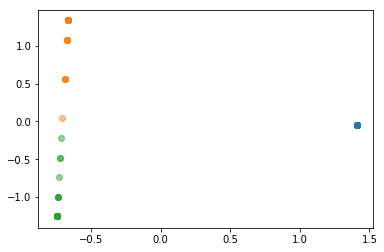

In [58]:
iris_pca = PCA().fit_transform(proximity_matrix)
# print(iris_pca.eigenvalues)
reduced_data = iris_pca.transformed_data.T[:2]

from matplotlib import pyplot

for target in set(iris.target):
    correct_target = (target == iris.target)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

In [10]:
print(cross_validation(iris_data, iris_labels,  ensemble.RandomForestClassifier()))

[1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8666666666666667, 0.8, 0.9333333333333333]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
extremly_randomized_trees_iris = ensemble.ExtraTreesClassifier()
extremly_randomized_trees_iris.fit(iris_data, iris_labels)
print(extremly_randomized_trees_iris.score(iris_data, iris_labels))

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
print(cross_validation(iris_data, iris_labels, ensemble.ExtraTreesClassifier()))

[1.0, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 0.8666666666666667, 0.8, 1.0]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
data = pd.read_csv("/home/lukasz/Downloads/titanic.csv", sep='\t')
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data['Sex'] = pd.Categorical(data['Sex']).codes
data['Embarked'] = pd.Categorical(data['Embarked']).codes
print(data)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    1  22.0      1      0    7.2500         2
1           1       1    0  38.0      1      0   71.2833         0
2           1       3    0  26.0      0      0    7.9250         2
3           1       1    0  35.0      1      0   53.1000         2
4           0       3    1  35.0      0      0    8.0500         2
6           0       1    1  54.0      0      0   51.8625         2
7           0       3    1   2.0      3      1   21.0750         2
8           1       3    0  27.0      0      2   11.1333         2
9           1       2    0  14.0      1      0   30.0708         0
10          1       3    0   4.0      1      1   16.7000         2
11          1       1    0  58.0      0      0   26.5500         2
12          0       3    1  20.0      0      0    8.0500         2
13          0       3    1  39.0      1      5   31.2750         2
14          0       3    0  14.0      0      0    7.8542      

In [69]:
titanic_labels = data['Survived']
titanic_data = data.drop('Survived', axis = 1)

In [70]:
random_forest_titanic = ensemble.RandomForestClassifier()
random_forest_titanic.fit(titanic_data, titanic_labels)
print(random_forest_titanic.score(titanic_data, titanic_labels))

0.952


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
print(cross_validation(titanic_data, titanic_labels, ensemble.RandomForestClassifier()))

[0.75, 0.6153846153846154, 0.6666666666666666, 1.0, 0.5, 0.6923076923076923, 0.8333333333333334, 0.7692307692307693, 0.6666666666666666, 0.8461538461538461]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
predictions_t = []
for decision_tree in random_forest_titanic.estimators_:
    predictions_t.append(decision_tree.predict(titanic_data))
# print(next(iris_data.iterrows()))
# random_forest_iris.predict(iris_data)
predictions_array_t = np.array(predictions_t)
for i in range(len(titanic_labels)):
    if len(set(predictions_array_t[:, i])) != 1:
        print(i, predictions_array_t[:, i])

0 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
2 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
9 [1. 0. 1. 1. 1. 1. 0. 1. 1. 0.]
12 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
13 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
16 [1. 1. 1. 0. 1. 1. 0. 0. 0. 1.]
18 [0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
19 [1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
20 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
24 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
26 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
30 [0. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
31 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
32 [0. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
34 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
37 [0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
38 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
39 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
41 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
42 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
50 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
51 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
52 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
54 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
56 [0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]
57 [0. 1. 0. 0. 0. 1. 1. 0. 1. 1.]
58 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
59 [1. 1. 1. 1. 1. 1. 1.

In [74]:
proximity_matrix_t = np.zeros((len(titanic_labels), len(titanic_labels)))
for tree_res_1 in predictions_t:
    for tree_res_2 in predictions_t:
        proximity_matrix_t += (np.array([tree_res_1]).T 
                             == np.array([tree_res_2])).astype(int)
proximity_matrix_t

array([[ 82.,  18.,  18., ...,  90.,  90.,  90.],
       [ 18.,  82.,  82., ...,  10.,  10.,  10.],
       [ 18.,  82.,  82., ...,  10.,  10.,  10.],
       ...,
       [ 90.,  10.,  10., ..., 100., 100., 100.],
       [ 90.,  10.,  10., ..., 100., 100., 100.],
       [ 90.,  10.,  10., ..., 100., 100., 100.]])

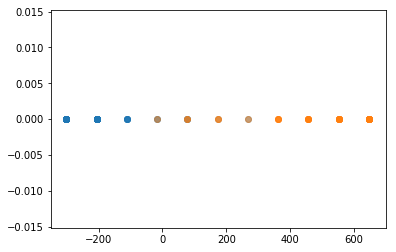

In [90]:
from sklearn.decomposition import PCA as sk_PCA

titanic_pca = sk_PCA().fit_transform(proximity_matrix_t)
# print(iris_pca.eigenvalues)
reduced_data = titanic_pca.T[:2].astype(float)
# print(reduced_data)
from matplotlib import pyplot

for target in set(titanic_labels):
    correct_target = (target == titanic_labels)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

In [82]:
reduced_data.astype(float)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([[ 1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
         1.40874019,  1.40874019,  1.40874019,  1.40874019,  1.40874019,
        -0.66993262, -0.66147133, -0.66993262, -0.66147133, -0.66147133,
        -0.66147133, -0.66993262, -0.68685521, -0.66147133, -0.66147133,
        -0.66147133, -0.66147133, -0.66147133, -0.66147133, -0.66147133,
        -0.66147133, -0.66147133, -0.66147133, -0.6

In [20]:
extremly_randomized_trees_titanic = ensemble.ExtraTreesClassifier()
extremly_randomized_trees_titanic.fit(titanic_data, titanic_labels)
print(extremly_randomized_trees_titanic.score(titanic_data, titanic_labels))

0.98595505618


In [22]:
print(cross_validation(titanic_data, titanic_labels, ensemble.ExtraTreesClassifier()))

[0.71830985915492962, 0.76056338028169013, 0.74647887323943662, 0.78873239436619713, 0.80555555555555558, 0.76056338028169013, 0.71830985915492962, 0.80281690140845074, 0.76056338028169013, 0.83333333333333337]


In [6]:
extremly_randomized_trees_titanic = ensemble.ExtraTreesClassifier(n_estimators=25)
extremly_randomized_trees_titanic.fit(titanic_data, titanic_labels)
print(extremly_randomized_trees_titanic.score(titanic_data, titanic_labels))

0.98595505618


In [7]:
random_forest_titanic = ensemble.RandomForestClassifier(n_estimators=25)
random_forest_titanic.fit(titanic_data, titanic_labels)
print(random_forest_titanic.score(titanic_data, titanic_labels))

0.984550561798


In [8]:
print(cross_validation(titanic_data, titanic_labels, 
                       ensemble.RandomForestClassifier(n_estimators=25)))

[0.76056338028169013, 0.81690140845070425, 0.76056338028169013, 0.78873239436619713, 0.86111111111111116, 0.81690140845070425, 0.74647887323943662, 0.76056338028169013, 0.78873239436619713, 0.875]
